In [ ]:
# Run this once at the top of the notebook
!pip install --quiet mplfinance plotly scipy ta pandas matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.graph_objects as go
from scipy.signal import argrelextrema
from datetime import datetime
import ta   # technical indicators
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

In [ ]:
#Upload file from your computer
from google.colab import files
uploaded = files.upload()   # choose your HDFCBank.csv
csv_name = list(uploaded.keys())[0]
df = pd.read_csv(csv_name)

# Quick clean / ensure date index
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')   # adjust dayfirst=True if needed
df = df.dropna(subset=['Date']).set_index('Date').sort_index()
df = df[['Open','High','Low','Close','Volume']]   # keep columns in that order
df.head()


Saving StockDataHDFCBANK.csv to StockDataHDFCBANK (1).csv


,Open,High,Low,Close,Volume
Date,,,,,
2023-04-03 09:15:00+05:30,1607.55,1609.55,1606.00,1606.65,169821
2023-04-03 09:20:00+05:30,1606.55,1607.95,1603.40,1607.25,203608
2023-04-03 09:25:00+05:30,1607.45,1607.65,1604.10,1607.00,164006
2023-04-03 09:30:00+05:30,1607.00,1610.15,1606.70,1609.10,226137
2023-04-03 09:35:00+05:30,1609.40,1610.40,1607.65,1608.25,138182


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1351 entries, 2023-04-03 09:15:00+05:30 to 2023-05-02 15:30:00+05:30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1351 non-null   float64
 1   High    1351 non-null   float64
 2   Low     1351 non-null   float64
 3   Close   1351 non-null   float64
 4   Volume  1351 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 63.3 KB
None
Date range: 2023-04-03 to 2023-05-02


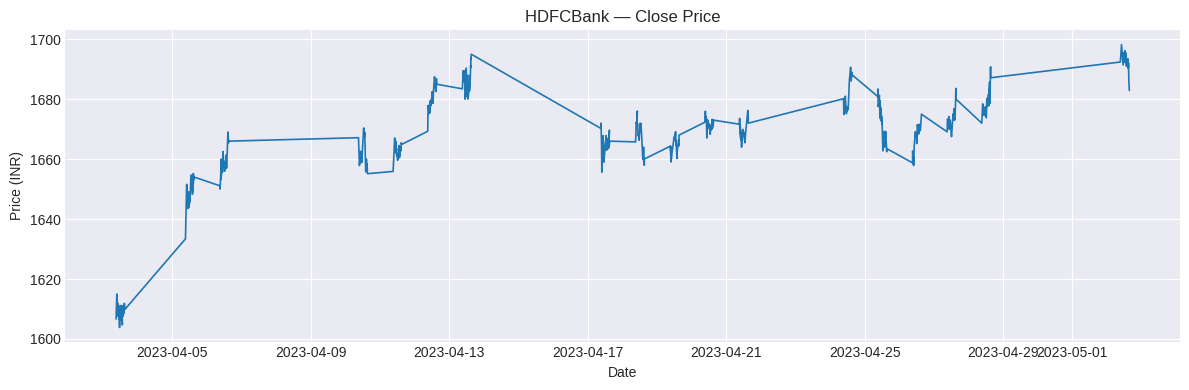

In [ ]:
print(df.info())
print("Date range:", df.index.min().date(), "to", df.index.max().date())

plt.figure(figsize=(12,4))
plt.plot(df.index, df['Close'], linewidth=1.2)
plt.title('HDFCBank — Close Price')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.tight_layout()
plt.show()


In [ ]:
# detect local extrema
close = df['Close']
order = 8   # sensitivity: bigger => fewer peaks. adjust to your timeframe.
max_idx = argrelextrema(close.values, np.greater, order=order)[0]
min_idx = argrelextrema(close.values, np.less, order=order)[0]
local_max = df.iloc[max_idx]
local_min = df.iloc[min_idx]

# show a few
local_max.head(), local_min.head()


(                              Open     High      Low    Close  Volume
 Date                                                                 
 2023-04-03 09:45:00+05:30  1610.55  1615.05  1610.55  1615.00   79283
 2023-04-03 11:50:00+05:30  1604.50  1609.95  1604.15  1609.95  591908
 2023-04-03 12:50:00+05:30  1609.05  1612.70  1609.05  1611.20  675455
 2023-04-05 10:10:00+05:30  1649.70  1652.00  1648.60  1651.60  405291
 2023-04-05 11:30:00+05:30  1647.95  1649.20  1647.50  1649.10  304099,
                               Open     High      Low    Close  Volume
 Date                                                                 
 2023-04-03 13:35:00+05:30  1611.10  1611.20  1604.70  1604.70  459748
 2023-04-05 11:05:00+05:30  1644.85  1644.95  1642.55  1643.55  252803
 2023-04-05 14:10:00+05:30  1650.30  1652.30  1648.30  1648.30  287287
 2023-04-06 09:20:00+05:30  1651.10  1652.75  1648.20  1650.00  290139
 2023-04-06 11:00:00+05:30  1656.70  1656.95  1655.10  1655.65   45348)

In [ ]:
# cluster nearby minima/maxima into support/resistance "levels"
def cluster_levels(prices, tol):
    levels = []
    for p in sorted(prices):
        if not levels:
            levels.append(p)
        else:
            if abs(p - np.array(levels)).min() > tol:
                levels.append(p)
    return sorted(levels)

# tolerance chosen as % of price range
price_range = df['Close'].max() - df['Close'].min()
tolerance = 0.02 * price_range   # 2% of range; tweak as needed

min_levels = cluster_levels(local_min['Close'].values, tolerance)
max_levels = cluster_levels(local_max['Close'].values, tolerance)
print("Support (min) levels:", np.round(min_levels,2))
print("Resistance (max) levels:", np.round(max_levels,2))


Support (min) levels: [1604.7  1643.55 1648.3  1655.15 1657.85 1659.85 1662.15 1665.2  1667.5
 1669.75 1672.   1674.65 1677.55 1680.   1682.55 1686.05 1691.4 ]
Resistance (max) levels: [1609.95 1615.   1649.1  1651.6  1654.7  1660.   1662.55 1664.55 1666.95
 1669.05 1671.35 1673.6  1676.   1677.95 1680.2  1682.55 1687.5  1690.35
 1693.5  1696.2  1698.25]


/tmp/ipython-input-3858812802.py:16: RankWarning:

Polyfit may be poorly conditioned

/usr/local/lib/python3.12/dist-packages/mplfinance/_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




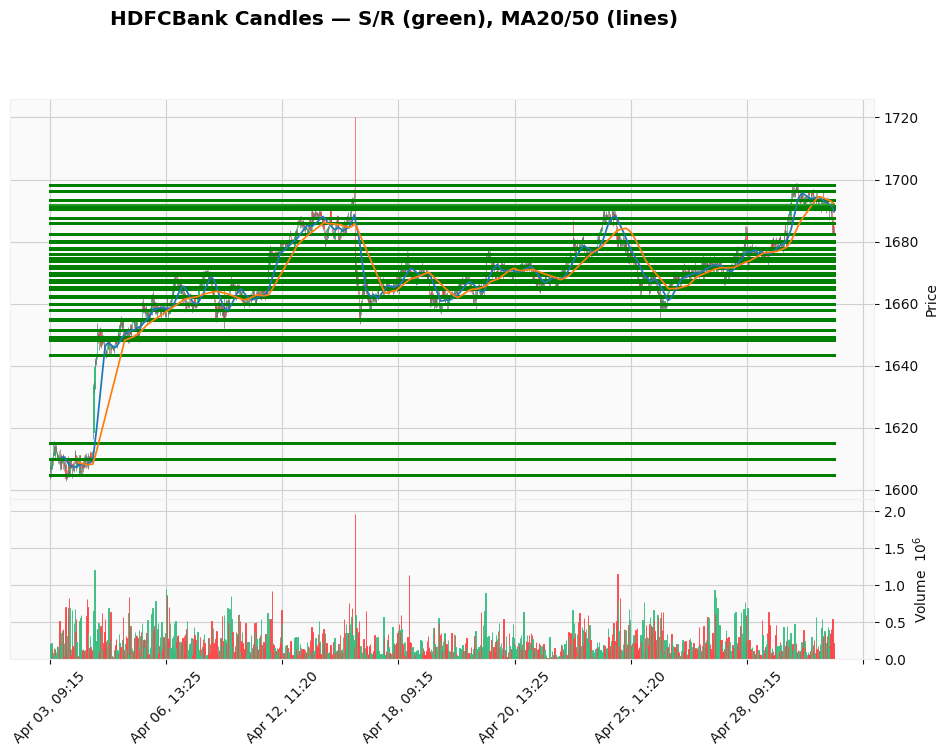

In [ ]:
# prepare addplots: moving averages and trendline examples
df['MA20'] = df['Close'].rolling(20).mean()
df['MA50'] = df['Close'].rolling(50).mean()

# create horizontal lines list (combine support + resistance)
hlines = sorted(set(min_levels + max_levels))

ap = [mpf.make_addplot(df['MA20']), mpf.make_addplot(df['MA50'])]

# If you want to draw trendline(s): example using two lows (you can pick different points)
# Simple trendline from two recent minima (if available)
if len(local_min) >= 2:
    lows_idx = local_min.index[-2:]
    x_points = np.array([d.toordinal() for d in lows_idx])
    y_points = df.loc[lows_idx, 'Close'].values
    coef = np.polyfit(x_points, y_points, 1)
    full_x = np.array([d.toordinal() for d in df.index])
    trend_vals = np.polyval(coef, full_x)
    ap.append(mpf.make_addplot(pd.Series(trend_vals, index=df.index)))

mpf.plot(df, type='candle', style='yahoo', volume=True, addplot=ap,
         hlines=dict(hlines=hlines, colors=['g']*len(hlines), linewidths=0.8),
         title='HDFCBank Candles — S/R (green), MA20/50 (lines)',
         figsize=(12,8))


In [ ]:
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.io as pio

# Force Plotly to render in Colab
pio.renderers.default = "colab"

# Ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create subplot: 2 rows (Candlestick + MA20 on top, Volume below)
fig = sp.make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.1,
    row_heights=[0.7, 0.3],
    subplot_titles=("Candlestick with 20-Day MA", "Trading Volume")
)

# Candlestick chart
fig.add_trace(go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name="Candlestick"
), row=1, col=1)

# Moving Average (MA20)
fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['MA20'],
    mode='lines',
    line=dict(color='blue', width=1.5),
    name="MA20"
), row=1, col=1)

# Volume bars
fig.add_trace(go.Bar(
    x=df['Date'],
    y=df['Volume'],
    name="Volume",
    marker_color="orange",
    opacity=0.6
), row=2, col=1)

# Layout settings
fig.update_layout(
    title="Bank of Baroda — Candlestick with 20-Day MA & Volume",
    xaxis_rangeslider_visible=False,
    template="plotly_white",
    showlegend=True,
    height=700   # <-- add height so it's visible
)

fig.show()

In [ ]:
def detect_double_top(close, order=8, tol=0.03, min_sep=5):
    peaks = argrelextrema(close.values, np.greater, order=order)[0]
    for i in range(len(peaks)):
        for j in range(i+1, len(peaks)):
            if peaks[j] - peaks[i] >= min_sep:
                p1, p2 = close.iloc[peaks[i]], close.iloc[peaks[j]]
                if abs(p1 - p2) / ((p1 + p2)/2) < tol:
                    trough = close.iloc[peaks[i]:peaks[j]].min()
                    if trough < min(p1, p2) * (1 - 0.01):   # trough noticeably lower
                        return True, (close.index[peaks[i]], close.index[peaks[j]])
    return False, None

def detect_head_and_shoulders(close, order=8, shoulder_tol=0.05):
    peaks = argrelextrema(close.values, np.greater, order=order)[0]
    for i in range(len(peaks)-2):
        left, mid, right = peaks[i], peaks[i+1], peaks[i+2]
        left_p, mid_p, right_p = close.iloc[[left,mid,right]]
        if (mid_p > left_p * 1.03) and (mid_p > right_p * 1.03):
            if abs(left_p-right_p)/((left_p+right_p)/2) < shoulder_tol:
                return True, (close.index[left], close.index[mid], close.index[right])
    return False, None

def detect_converging_triangle(high, low, window=50):
    # take last window and check if highs slope negative and lows slope positive
    h = high[-window:]
    l = low[-window:]
    x = np.arange(len(h))
    hi_coef = np.polyfit(x, h.values, 1)[0]
    lo_coef = np.polyfit(x, l.values, 1)[0]
    # both slopes approaching each other (hi negative, lo positive)
    if hi_coef < 0 and lo_coef > 0:
        return True, (hi_coef, lo_coef)
    return False, None

# apply detectors on the whole series
is_double, dt_idx = detect_double_top(df['Close'])
is_hs, hs_idx = detect_head_and_shoulders(df['Close'])
is_tri, tri_coefs = detect_converging_triangle(df['High'], df['Low'], window=min(120, len(df)))

print("Double top:", is_double, dt_idx)
print("Head & Shoulders:", is_hs, hs_idx)
print("Converging triangle (heuristic):", is_tri, tri_coefs)


Double top: True (Timestamp('2023-04-12 09:30:00+0530', tz='UTC+05:30'), Timestamp('2023-04-18 10:30:00+0530', tz='UTC+05:30'))
Head & Shoulders: False None
Converging triangle (heuristic): False None


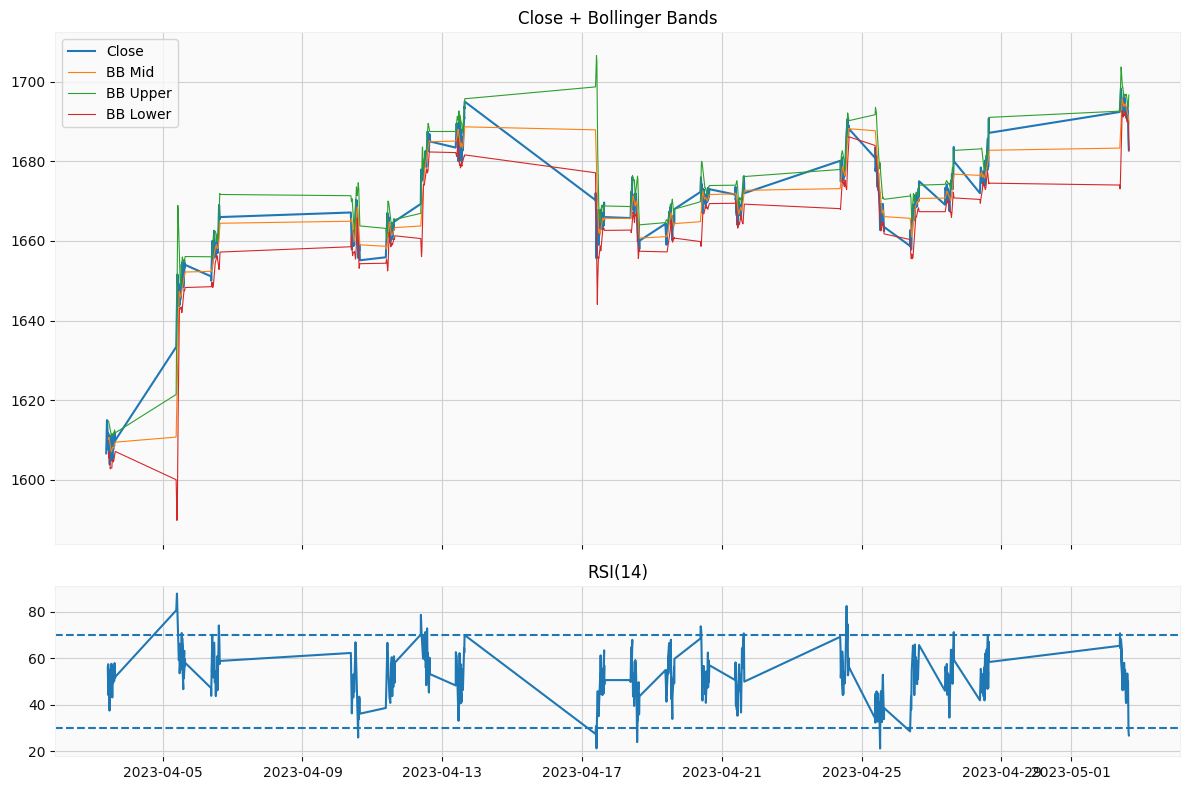

In [ ]:
# Bollinger
df['BB_Mid'] = df['Close'].rolling(20).mean()
df['BB_Upper'] = df['BB_Mid'] + 2*df['Close'].rolling(20).std()
df['BB_Lower'] = df['BB_Mid'] - 2*df['Close'].rolling(20).std()

# RSI
df['RSI14'] = ta.momentum.rsi(df['Close'], window=14)

# MACD diff
df['MACD_diff'] = ta.trend.macd_diff(df['Close'])

# Plot Close + BB and RSI
fig, ax = plt.subplots(2, 1, figsize=(12,8), gridspec_kw={'height_ratios':[3,1]}, sharex=True)
ax[0].plot(df.index, df['Close'], label='Close')
ax[0].plot(df.index, df['BB_Mid'], label='BB Mid', linewidth=0.8)
ax[0].plot(df.index, df['BB_Upper'], label='BB Upper', linewidth=0.8)
ax[0].plot(df.index, df['BB_Lower'], label='BB Lower', linewidth=0.8)
ax[0].legend()
ax[0].set_title('Close + Bollinger Bands')

ax[1].plot(df.index, df['RSI14'])
ax[1].axhline(70, linestyle='--'); ax[1].axhline(30, linestyle='--')
ax[1].set_title('RSI(14)')
plt.tight_layout()
plt.show()


Saved: /content/hdfcbank_close.png (and optionally interactive html)


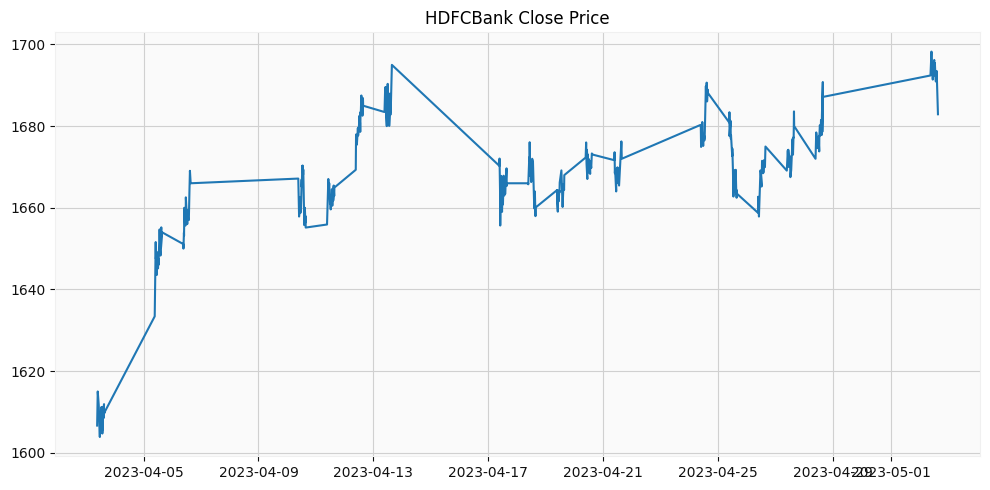

In [ ]:
# save static images for slides
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Close'])
plt.title('HDFCBank Close Price')
plt.tight_layout()
plt.savefig('/content/hdfcbank_close.png', dpi=300)

# save interactive HTML (openable in browser)
# fig from earlier plotly figure (if in scope)
# fig.write_html('/content/hdfcbank_interactive.html')

print("Saved: /content/hdfcbank_close.png (and optionally interactive html)")




### 📌 Summary

In this task, we explored the **fundamentals of technical analysis** using the HDFCBank historical stock dataset.

* **Support and Resistance:** Identified key price levels where buying or selling pressure is likely to appear.
* **Trendlines:** Drew trendlines to visualize the overall direction of price movement (uptrend or downtrend).
* **Chart Types:** Compared line, bar, and candlestick charts, highlighting how each provides different levels of detail.
* **Candlestick Charts:** Learned the structure of candlesticks (open, high, low, close) and used them to study price action.
* **Chart Patterns:** Detected common patterns (double tops, head & shoulders, triangles) that signal possible reversals or continuations.
* **Indicators:** Applied moving averages, Bollinger Bands, and RSI for deeper trend and momentum insights.
* **Visualisation:** Created both static and interactive charts to clearly illustrate technical analysis concepts.

👉 By combining these tools, we gained a **practical understanding of price behavior**, which helps in making more informed trading and investment decisions.

